In [85]:
# #install specific libraries
#!pip install seaborn

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns

In [87]:
df = pd.read_csv("../data/car_cleaned_data.csv")
df

symboling  normalized-losses         make aspiration num-of-doors  \
0            3                122  alfa-romero        std          two   
1            3                122  alfa-romero        std          two   
2            1                122  alfa-romero        std          two   
3            2                164         audi        std         four   
4            2                164         audi        std         four   
..         ...                ...          ...        ...          ...   
196         -1                 95        volvo        std         four   
197         -1                 95        volvo      turbo         four   
198         -1                 95        volvo        std         four   
199         -1                 95        volvo      turbo         four   
200         -1                 95        volvo      turbo         four   

      body-style drive-wheels engine-location  wheel-base    length  ...  \
0    convertible          rwd           front        88.6  0.811148  ...   
1    convertible          rwd           front        88.6  0.811148  ...   
2      hatchback          rwd           front        94.5  0.822681  ...   
3          sedan          fwd           front        99.8  0.848630  ...   
4          sedan          4wd           front        99.4  0.848630  ...   
..           ...          ...             ...         ...       ...  ...   
196        sedan          rwd           front       109.1  0.907256  ...   
197        sedan          rwd           front       109.1  0.907256  ...   
198        sedan          rwd           front       109.1  0.907256  ...   
199        sedan          rwd           front       109.1  0.907256  ...   
200        sedan          rwd           front       109.1  0.907256  ...   

     compression-ratio  horsepower  peak-rpm city-mpg highway-mpg    price  \
0                  9.0       111.0    5000.0       21          27  13495.0   
1                  9.0       111.0    5000.0       21          27  16500.0   
2                  9.0       154.0    5000.0       19          26  16500.0   
3                 10.0       102.0    5500.0       24          30  13950.0   
4                  8.0       115.0    5500.0       18          22  17450.0   
..                 ...         ...       ...      ...         ...      ...   
196                9.5       114.0    5400.0       23          28  16845.0   
197                8.7       160.0    5300.0       19          25  19045.0   
198                8.8       134.0    5500.0       18          23  21485.0   
199               23.0       106.0    4800.0       26          27  22470.0   
200                9.5       114.0    5400.0       19          25  22625.0   

    city-L/100km  horsepower-binned  diesel  gas  
0      11.190476             Medium       0    1  
1      11.190476             Medium       0    1  
2      12.368421             Medium       0    1  
3       9.791667             Medium       0    1  
4      13.055556             Medium       0    1  
..           ...                ...     ...  ...  
196    10.217391             Medium       0    1  
197    12.368421               High       0    1  
198    13.055556             Medium       0    1  
199     9.038462             Medium       1    0  
200    12.368421             Medium       0    1  

[201 rows x 29 columns]

# Prediction of price using Simple Linear Regression

In [88]:
# Importing required libraries
from sklearn.linear_model import LinearRegression

In [89]:
# Create a Linear Regression object
lm = LinearRegression()

#  Select the predictor variables (independent variables)
X = df[['highway-mpg']]

# Select the response variable (dependent variable)
Y = df['price']

In [90]:
# Fit the linear model to the data (train the model)
lm.fit(X, Y)

LinearRegression()

In [91]:
# 'Yhat' will contain the predicted price values based on the model
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [92]:
# find out the value of intercept(a)
lm.intercept_

38423.305858157386

In [93]:
# find out the value of the slope (b)
lm.coef_

array([-821.73337832])

In [94]:
#final estimated linear model
# we should get a final linear model with the structure: Yhat = a + bX
#Plugging in the actual values 

<b>Price</b> = 38423.31 -821.73 x <b>highway-mpg</b>

In [95]:
#create linear regression object as lm1
lm1=LinearRegression()
lm1

LinearRegression()

In [96]:
#Train the model using "engine-size" as the independent variable and "price" as the dependent variable
lm1.fit(df[['engine-size']],df[['price']])

LinearRegression()

In [97]:
#Find the slope (b)
lm1.coef_

array([[166.86001569]])

In [98]:
#Find the intercept(a)
lm1.intercept_

array([-7963.33890628])

In [99]:
#equation of the predicted line? You can use x and yhat or "engine-size" or "price"
Yhat= -7963.34 +166.86*X
Price=-7963.34 + 166.86*df['engine-size']
#predicted price
print(Price)

0      13728.46
1      13728.46
2      17399.38
3      10224.40
4      14729.62
         ...   
196    15563.92
197    15563.92
198    20903.44
199    16231.36
200    15563.92
Name: engine-size, Length: 201, dtype: float64


# Prediction of price using Multiple Linear Regression

In [100]:
# Select multiple columns from the DataFrame as predictors
# These are the features we will use in our regression model
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

# At this point, Z is a DataFrame that includes 4 features (columns)
# It will be used as input X for training the multiple linear regression model


In [101]:
Z.head()


horsepower  curb-weight  engine-size  highway-mpg
0       111.0         2548          130           27
1       111.0         2548          130           27
2       154.0         2823          152           26
3       102.0         2337          109           30
4       115.0         2824          136           22

In [102]:
lm.fit(Z,df['price'])

LinearRegression()

In [103]:
#Find the intercept(a)
lm.intercept_

-15806.624626329198

In [104]:
#Find the slope (b1,b2,b3,b4)
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

<b>Price</b> = -15806.624626329198 + 53.49574423 x <b>horsepower</b> + 4.70770099 x <b>curb-weight</b> + 81.53026382 x <b>engine-size</b> + 36.05748882 x <b>highway-mpg</b>

In [108]:
# Vectorized computation of predicted price
price = (
    -15806.624626329198
    + 53.49574423 * df['horsepower']
    + 4.70770099 * df['curb-weight']
    + 81.53026382 * df['engine-size']
    + 36.05748882 * df['highway-mpg']
)

# Display the first few predicted prices
print(price.head())


0    13699.111600
1    13699.111600
2    19051.654690
3    10620.361920
4    15521.314189
dtype: float64


# Train a Multiple Linear Regression model as "lm2"

In [106]:
#Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg"
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

In [112]:
print("Coefficients:", lm2.coef_)

Coefficients: [   1.49789586 -820.45434016]


In [113]:
print("intercepts:", lm2.intercept_)

intercepts: 38201.313272457264


In [115]:
Price = 38201.313272457264 + 1.49789586 * df['normalized-losses'] -820.45434016 * df['highway-mpg']
#predicted price based on normalized-losses and highway-mpg
Price

0      16231.789383
1      16231.789383
2      17052.243723
3      13833.337989
4      20396.972710
           ...     
196    15370.891855
197    17832.254875
198    19473.163555
199    16191.346195
200    17832.254875
Length: 201, dtype: float64

# Model Evaluation Using Visualization

In [118]:
# import the visualization package: seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

(0.0, 48175.50954804779)

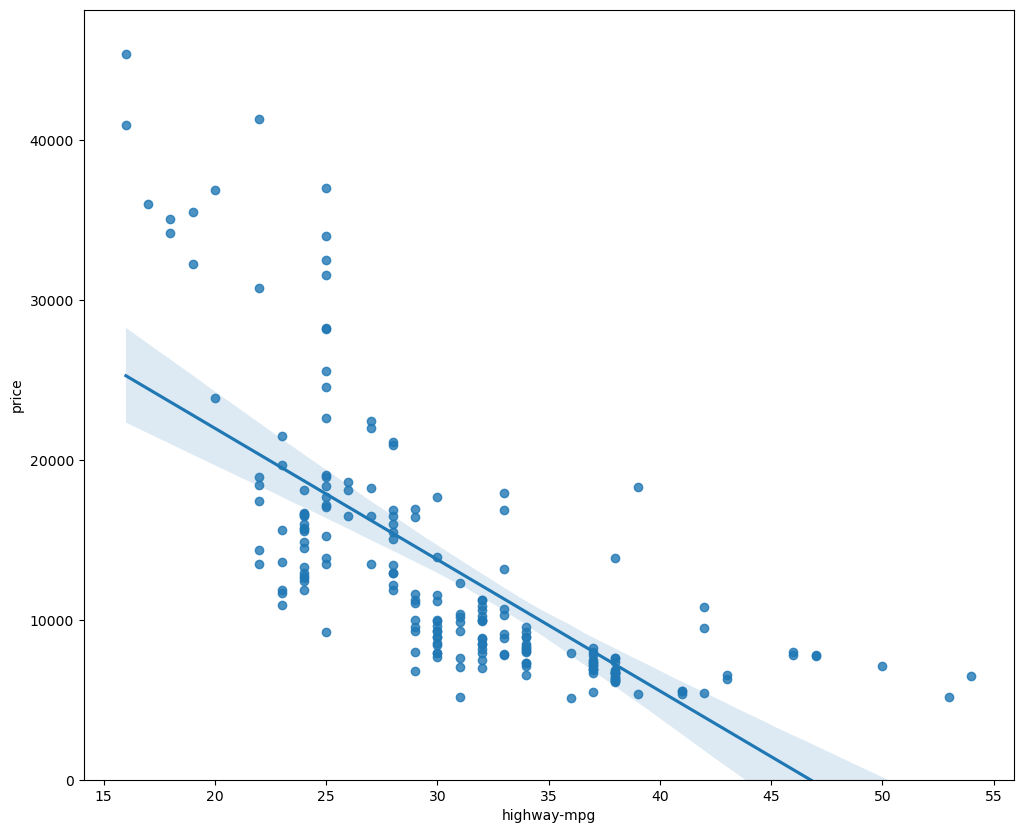

In [120]:
# Set plot size for better visibility
width = 12
height = 10

# Plot regression of highway-mpg vs price
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)  # Set y-axis lower limit to 0
# This plot shows a negative correlation between highway-mpg and price with points close to the regression line


(0.0, 47414.1)

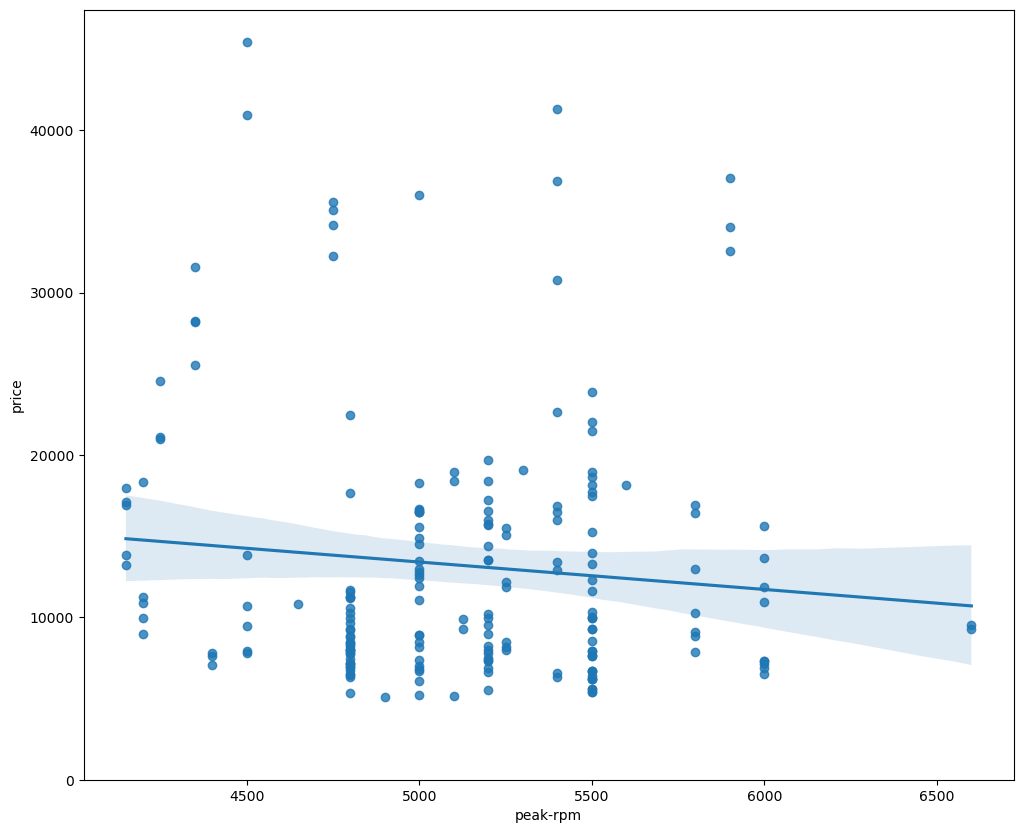

In [121]:
# Plot regression of peak-rpm vs price for comparison
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)  # Set y-axis lower limit to 0
# This plot shows a weaker relationship with more scattered points around the regression line


In [122]:
# Check correlation values between price and the predictors
df[["peak-rpm", "highway-mpg", "price"]].corr()
# This will show that "highway-mpg" has a stronger negative correlation with price (~ -0.70)
# while "peak-rpm" has a much weaker correlation (~ -0.10)

peak-rpm  highway-mpg     price
peak-rpm     1.000000    -0.058598 -0.101616
highway-mpg -0.058598     1.000000 -0.704692
price       -0.101616    -0.704692  1.000000

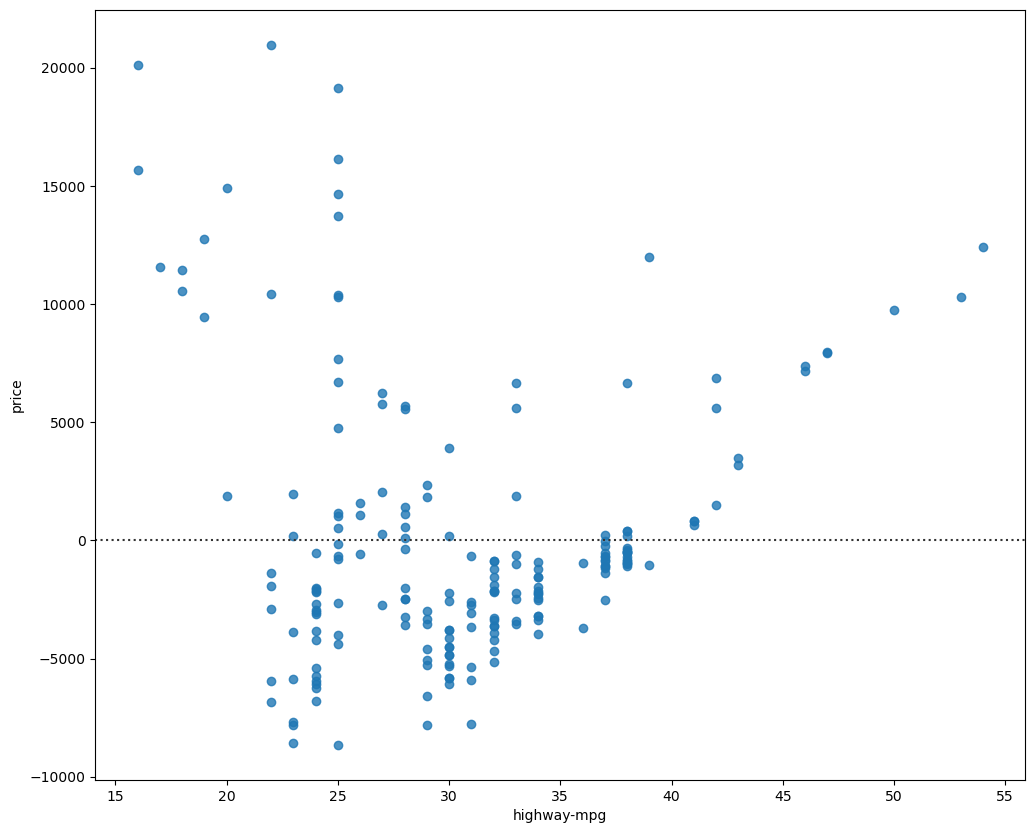

In [123]:
# Set plot size for clarity
width = 12
height = 10

# Plot residuals of highway-mpg vs price
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()
# Residual plot helps check if residuals are randomly scattered around zero,
# which indicates that a linear model is a good fit for this data.

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


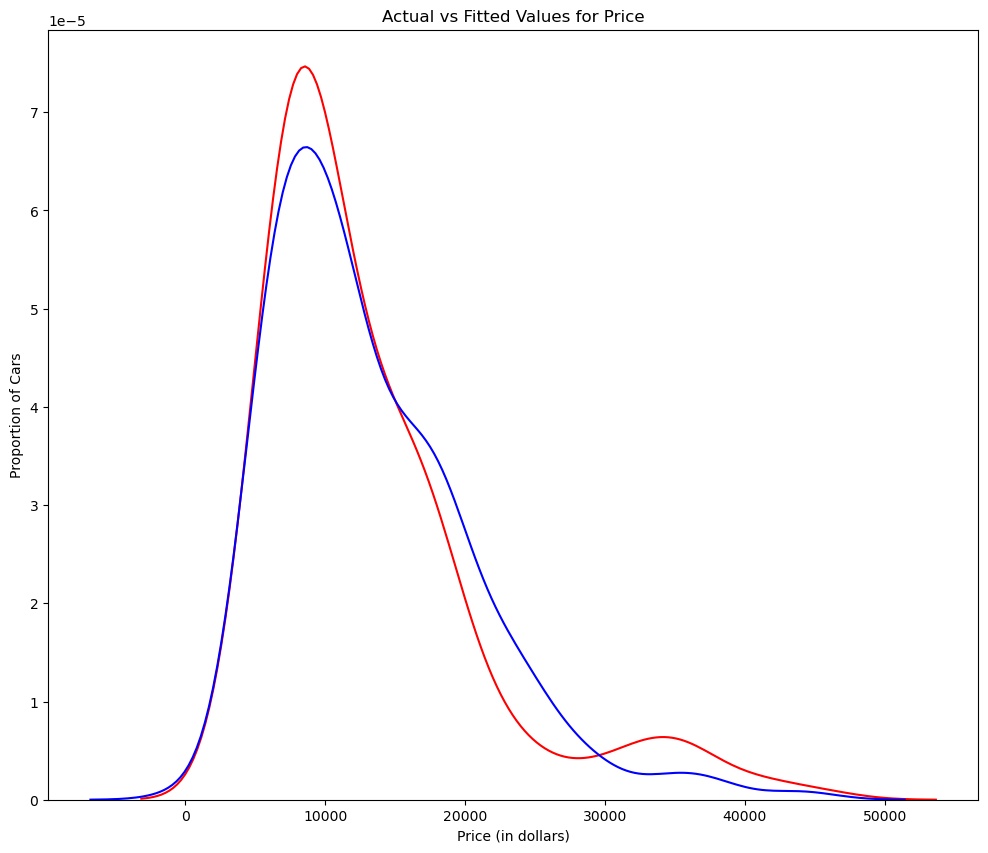

In [125]:
# Predict prices using the multiple linear regression model lm and predictors Z
Y_hat = lm.predict(Z)

# Set plot size for better visualization
plt.figure(figsize=(width, height))

# Plot distribution of actual prices (red) without histogram
ax1 = sns.kdeplot(df['price'], color="r", label="Actual Value", fill=False)

# Plot distribution of predicted prices (blue) on the same axis
sns.kdeplot(Y_hat, color="b", label="Fitted Values", fill=False, ax=ax1)

# Add title and axis labels for clarity
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()


In [128]:
# Function to plot polynomial regression fit
def PlotPolly(model, independent_variable, dependent_variable, Name):
    # Generate 100 points evenly spaced between 15 and 55
    x_new = np.linspace(15, 55, 100)
    
    # Predict y values for the new x values using the polynomial model
    y_new = model(x_new)
    
    # Plot original data points and polynomial regression line
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    
    # Title and axis labels for clarity
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    
    # Set light gray background color for plot
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    
    # Show and close the plot
    plt.show()
    plt.close()

In [129]:
x = df['highway-mpg']
y = df['price']

In [130]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


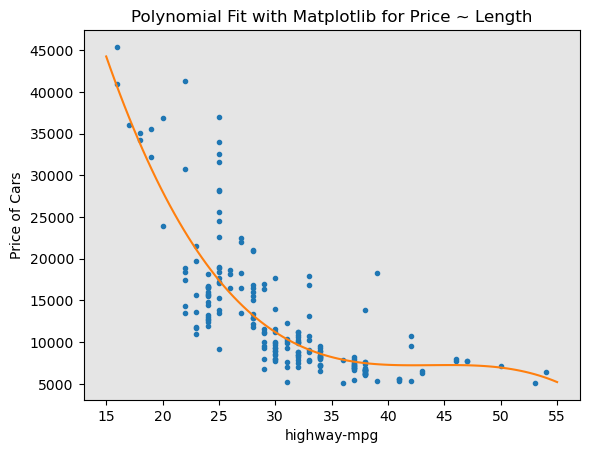

In [131]:
PlotPolly(p, x, y, 'highway-mpg')

In [132]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


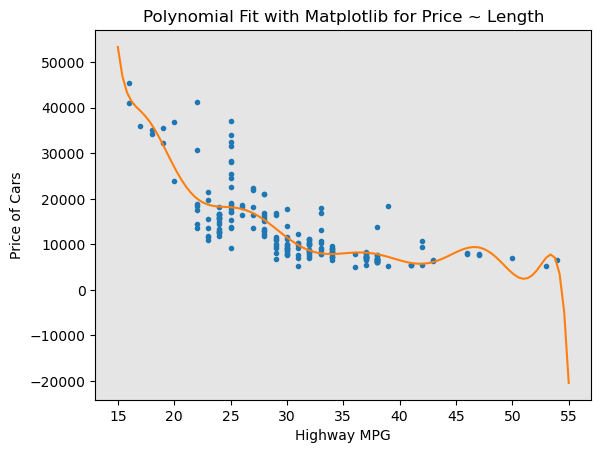

In [133]:
# Create an 11th-order polynomial model for variables x and y
f1 = np.polyfit(x, y, 11)  # Fit the polynomial (degree 11)
p1 = np.poly1d(f1)         # Create a polynomial object

# Print the polynomial equation
print(p1)

# Visualize the polynomial fit
PlotPolly(p1, x, y, 'Highway MPG')
# This high-order polynomial may overfit the data, especially if x and y are not smoothly varying.


In [134]:
# Import module to apply polynomial transform on multiple features
from sklearn.preprocessing import PolynomialFeatures
# This will allow transforming multiple input features into polynomial features for multivariate regression

In [136]:
# Create and apply 2nd-degree polynomial transform
pr = PolynomialFeatures(degree=2)
Z_pr = pr.fit_transform(Z)

In [137]:
# Check original and transformed shapes
Z.shape       # (201, 4)
Z_pr.shape    # (201, 15)

(201, 15)

# Pipeline

In [139]:
# Import necessary modules
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create pipeline steps: scaling ‚Üí polynomial features ‚Üí linear regression
Input = [('scale', StandardScaler()), 
         ('polynomial', PolynomialFeatures(include_bias=False)), 
         ('model', LinearRegression())]

# Build pipeline
pipe = Pipeline(Input)

# Convert features to float type
Z = Z.astype(float)

# Fit pipeline to data
pipe.fit(Z, y)

# Predict using the pipeline
ypipe = pipe.predict(Z)
ypipe[0:4]  # Show first 4 predictions


array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [140]:
# Import required classes
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Create a pipeline: standardize ‚Üí linear regression
Input = [('scale', StandardScaler()), ('model', LinearRegression())]
pipe = Pipeline(Input)

# Fit the pipeline on the data
pipe.fit(Z, y)

# Predict using the pipeline
ypipe = pipe.predict(Z)

# Show first 10 predictions
ypipe[0:10]


array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

#  Evaluating our models

<b>Model 1: Simple Linear Regression<b/>

In [141]:
# Fit the linear model using X and Y
lm.fit(X, Y)

# Calculate and print R-squared value
print('The R-square is: ', lm.score(X, Y))
# This shows how much of the variation in price is explained by the model


The R-square is:  0.4965911884339175


In [142]:
# Predict the target values using the fitted model
Yhat = lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])


The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [143]:
# Import function to calculate mean squared error
from sklearn.metrics import mean_squared_error

# Compute and print the mean squared error
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


<b>Model 2: Multiple Linear Regression<b/>

In [144]:
# Fit the multiple linear regression model
lm.fit(Z, df['price'])

# Calculate and print R-squared
print('The R-square is: ', lm.score(Z, df['price']))
# ~80.896% of the variation in price is explained by this model


The R-square is:  0.8093562806577457


In [145]:
# Predict target values using the fitted model
Y_predict_multifit = lm.predict(Z)

# Calculate and print Mean Squared Error
print('The mean square error of price and predicted value using multifit is: ',
      mean_squared_error(df['price'], Y_predict_multifit))


The mean square error of price and predicted value using multifit is:  11980366.87072649


<b>Model 3: Polynomial Fit<b/>

In [146]:
# Import r2_score for polynomial model evaluation
from sklearn.metrics import r2_score

# Calculate R-squared for polynomial model
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)
# ~67.419% of the variation in price is explained by this polynomial fit


The R-square value is:  0.6741946663906513


In [147]:
# Calculate and print MSE for polynomial fit
print('The mean square error is: ', mean_squared_error(df['price'], p(x)))

The mean square error is:  20474146.42636125


# Prediction and Decision Making

In [148]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


In [149]:
# Create new input values for prediction
new_input = np.arange(1, 100, 1).reshape(-1, 1)

# Fit the model on existing data
lm.fit(X, Y)


LinearRegression()

In [150]:
# Predict using the new input values
yhat = lm.predict(new_input)
yhat[0:5]  # Show first 5 predictions


C:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

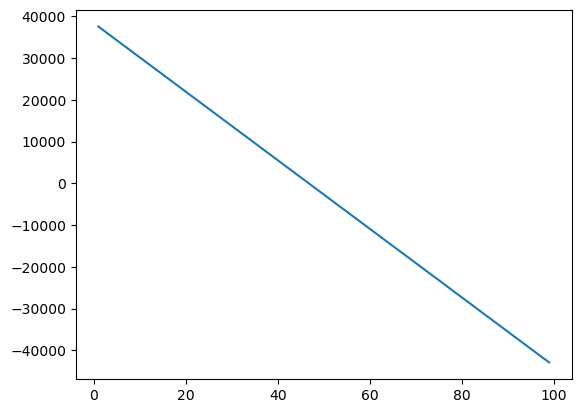

In [151]:
# Plot the predicted values
plt.plot(new_input, yhat)
plt.show()


# Decision Making: Determining a Good Model Fit

### ‚úÖ **Conclusion: Determining the Best Model Fit**

Based on the evaluation metrics (**R-squared** and **Mean Squared Error (MSE)**) for each model:

---

#### **1. Simple Linear Regression**  
- **R-squared**: 0.4966  
- **MSE**: 3.16 √ó 10‚Å∑  
- ‚û§ *Explains ~49.66% of the variation in price.*  
- ‚û§ *High error ‚Üí not a strong model.*

---

#### **2. Multiple Linear Regression**  
- **R-squared**: 0.8089  
- **MSE**: 1.2 √ó 10‚Å∑  
- ‚úÖ **Best overall performance**  
- ‚û§ *Explains ~80.89% of the variation in price with lowest prediction error.*

---

#### **3. Polynomial Regression**  
- **R-squared**: 0.6742  
- **MSE**: 2.05 √ó 10‚Å∑  
- ‚û§ *Better than simple linear but not as good as multiple linear.*

---

### üèÅ **Final Decision:**
**‚úÖ Multiple Linear Regression** is the best model among the three.  
It has the **highest R-squared** and **lowest MSE**, meaning it explains the most variation in price and makes the most accurate predictions.
